# Q1 What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.


ANS1 K-Means and Hierarchical Clustering are both unsupervised clustering techniques, but they differ in how clusters are formed and used.

#1. K-Means Clustering
#What it is

K-Means partitions data into K predefined clusters by minimizing the within-cluster variance (distance to cluster centroids).


#Key characteristics


.You must choose K in advance


.Uses centroids (means) of clusters


.Iterative and computationally efficient


.Works best with large, numeric datasets


.Sensitive to initialization and outliers


#How it works (brief)


.Choose K cluster centers


.Assign each data point to the nearest center


.Recompute centers


.Repeat until convergence


#Use case
#Customer segmentation in e-commerce


.Cluster customers based on features like age, income, purchase frequency, and spending score


.Works well because:


.Dataset is large


.You already have an idea of how many segments you want (e.g., 5 customer types)





#2. Hierarchical Clustering
#What it is
Hierarchical clustering builds a tree-like structure (dendrogram) of clusters, either by:


.Agglomerative (bottom-up): merge closest clusters

.Divisive (top-down): split clusters


#Key characteristics


.No need to predefine number of clusters


.Produces a dendrogram for visualization


.Computationally expensive for large datasets


.Works well with small to medium datasets


.Less sensitive to initialization


#How it works (brief)


.Compute distance between all data points


.Merge or split clusters based on linkage criteria:


.Single, complete, average, or Ward’s linkage




#Use case
#Gene expression analysis (bioinformatics)


.Cluster genes or patients based on expression patterns


.Useful because:


.Number of clusters is unknown


.Dendrogram helps understand biological relationships





#Key Differences Summary

| Aspect             | K-Means                     | Hierarchical Clustering     |
| ------------------ | --------------------------- | --------------------------- |
| Number of clusters | Must be predefined (K)      | Determined after dendrogram |
| Output             | Flat clusters               | Tree structure (dendrogram) |
| Scalability        | Very scalable               | Poor for large datasets     |
| Interpretability   | Moderate                    | High (visual hierarchy)     |
| Sensitivity        | Sensitive to initialization | Less sensitive              |


# Q2 Explain the purpose of the Silhouette Score in evaluating clustering algorithms.



ANS2 The Silhouette Score is a metric used to evaluate the quality of clustering by measuring how well each data point fits within its assigned cluster compared to other clusters.

#Purpose of the Silhouette Score

The main purpose of the Silhouette Score is to assess:

.Cluster cohesion → how close a point is to other points in the same cluster

.Cluster separation → how far a point is from points in the nearest neighboring cluster

It provides a single, interpretable value that reflects how well the clustering structure is formed.

#How the Silhouette Score Works

For each data point
𝑖
i:

.𝑎
(
𝑖
)
a(i): average distance between
𝑖
i and all other points in the same cluster

.𝑏
(
𝑖
)
b(i): average distance between
𝑖
i and all points in the nearest different cluster

The silhouette value for point
𝑖
i is:

    s(i)=max(a(i),b(i))b(i)−a(i)​


The overall Silhouette Score is the average of
𝑠
(
𝑖
)
s(i) across all data points.


#Range and Interpretation

The Silhouette Score ranges from −1 to +1:

.Close to +1 → well-clustered (high cohesion, good separation)

.Around 0 → overlapping or poorly separated clusters

.Negative values → points likely assigned to the wrong cluster

#Why It Is Important

.Model evaluation: Compares the quality of clustering across different algorithms

.Choosing optimal K: Helps select the best number of clusters (e.g., in K-Means)

.Algorithm comparison: Enables fair comparison between clustering methods

.No ground truth required: Works without labeled data

#Example Use Case

#Choosing K in K-Means

.Run K-Means for different values of K

.Compute the Silhouette Score for each K

.Select the K with the highest Silhouette Score

#Key Limitations

.Computationally expensive for very large datasets

.Assumes clusters are convex and well-separated

.May not perform well for non-spherical clusters



# Q3  What are the core parameters of DBSCAN, and how do they influence the clustering process?

ANS3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clusters data based on density, not distance to centroids. Its behavior is controlled by a few core parameters that directly influence how clusters are formed.

#Core Parameters of DBSCAN
#1. ε (Epsilon / eps)

#Definition:
.The maximum distance between two points for them to be considered neighbors.

#Influence on clustering:

.Small eps → many points labeled as noise, clusters may split

.Large eps → clusters may merge, loss of structure

#Interpretation:
Controls the radius of neighborhood.

#2. min_samples (MinPts)

#Definition:
The minimum number of points (including the point itself) required within eps to form a dense region.

#Influence on clustering:

.Low min_samples → more clusters, sensitive to noise

.High min_samples → fewer clusters, more points marked as noise

#Interpretation:
Controls how dense a region must be to be considered a cluster.

#Types of Points Defined by These Parameters

Using eps and min_samples, DBSCAN classifies points as:

#1. Core Point

.Has ≥ min_samples points within distance eps

.Forms the backbone of a cluster

#2. Border Point

.Lies within eps of a core point

.Has fewer than min_samples neighbors

.Assigned to a cluster but doesn’t expand it

#3. Noise (Outlier)

.Not within eps of any core point

.Labeled as -1

#Additional (Secondary) Parameters
#3. Distance Metric

.Common: Euclidean, Manhattan, cosine

.Impacts neighborhood calculation

.Important for high-dimensional data

#4. Algorithm

.ball_tree, kd_tree, or brute

.Affects performance, not clustering result

#Practical Effects Summary

| Parameter   | Too Small             | Too Large       |
| ----------- | --------------------- | --------------- |
| eps         | Too many noise points | Merged clusters |
| min_samples | Fragmented clusters   | Excessive noise |


# Q4 Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?




ANS4 Feature scaling is crucial in clustering algorithms like K-Means and DBSCAN because these methods rely directly on distance calculations. If features are on different scales, the distance measure becomes biased, leading to incorrect cluster formation.

#Why Feature Scaling Matters
#1. Distance-Based Algorithms Are Scale-Sensitive

Both K-Means and DBSCAN use distance metrics (typically Euclidean distance):

.K-Means minimizes distances to centroids

.DBSCAN defines neighborhoods using distance (eps)

If one feature has a much larger numerical range, it will dominate the distance calculation, regardless of its actual importance.


#Example (Without Scaling)

Suppose you cluster customers using:

.Age: 18–60

.Annual Income: 2–20 lakhs

Income will dominate distance calculations, and age will have little influence, even if age is meaningful

#Impact on Specific Algorithms
#K-Means

.Centroids shift toward high-magnitude features

.Clusters become biased and poorly separated

.Results depend more on units than data patterns

#DBSCAN

.eps becomes meaningless if features have different scales

.Dense regions may not be detected correctly

.Many points may be incorrectly labeled as noise

#Benefits of Feature Scaling

.Ensures equal contribution of all features

.Improves cluster quality and stability

.Makes hyperparameters (like K and eps) more interpretable

.Leads to more accurate and meaningful clusters

#Common Scaling Techniques
| Method                        | When to Use                          |
| ----------------------------- | ------------------------------------ |
| **Standardization (Z-score)** | Most common, works well with K-Means |
| **Min-Max Scaling**           | When features have fixed bounds      |
| **Robust Scaling**            | When data contains outliers          |


#When Scaling Is Less Critical

.Algorithms not based on distance (e.g., tree-based models)

.When all features are already on the same scale



# Q5 What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?



ANS5 The Elbow Method is a heuristic used in K-Means clustering to help choose the optimal number of clusters (K) by analyzing how cluster compactness changes as K increases.

#What the Elbow Method Is

K-Means minimizes Within-Cluster Sum of Squares (WCSS), also called inertia:

WCSS=i=1∑K​x∈Ci​∑​∥x−μi​∥2

As K increases, WCSS always decreases, because data points are split into smaller, tighter clusters.

#How the Elbow Method Works

1.Run K-Means for a range of K values (e.g., 1 to 10)

2.Compute WCSS for each K

3.Plot K vs. WCSS

4.Look for a point where the rate of decrease sharply changes

This point is called the “elbow”.

#Why It Works

.For small K:
Adding clusters significantly improves compactness → steep drop in WCSS

.After a certain K:
Additional clusters provide diminishing returns

The elbow indicates a balance between model simplicity and cluster qualit

#How It Helps Determine Optimal K

.The elbow point represents a K where:

    .Clusters are sufficiently compact

    .Adding more clusters does not meaningfully improve performance

.Helps avoid:

    .Under-clustering (too few clusters)

    .Over-clustering (too many clusters)


#Example Use Case

#Customer segmentation

.Try K = 1 to 10

.Elbow appears at K = 4

.Choose 4 customer segments as optimal

#Limitations

.The elbow is sometimes not clearly visible

.Subjective interpretation

.Works best when clusters are well separated

#Complementary Methods

.Silhouette Score (quantitative validation)

.Gap Statistic

.Domain knowledge



# Q6 Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)



#ANS6

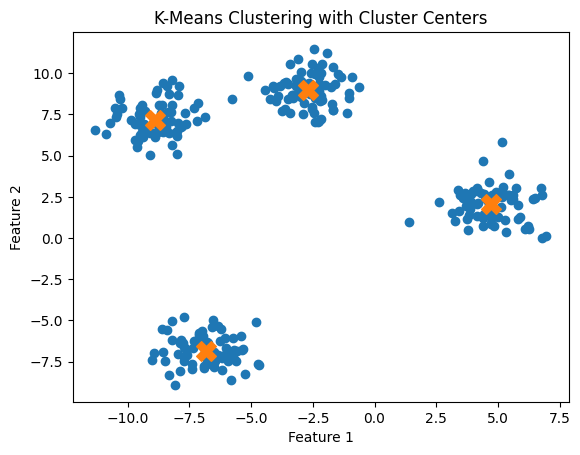

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Visualize the results
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Q7 Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)


#ANS7

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


# Q8 Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
(Include your Python code and output in the code box below.)



#ANS8

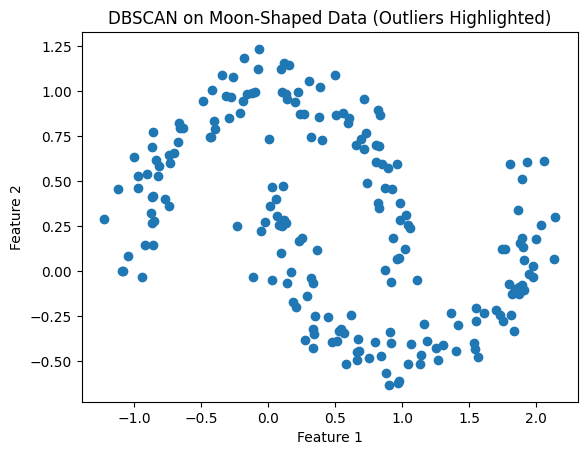

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify clusters and outliers
outliers = labels == -1
clusters = labels != -1

# Plot the results
plt.figure()
plt.scatter(X[clusters, 0], X[clusters, 1])
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x')
plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Q9 Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)



#ANS9

Explained variance ratio by the first two principal components: [0.36198848 0.1920749 ]
Cumulative explained variance ratio: [0.36198848 0.55406338]
Shape after PCA: (178, 2)


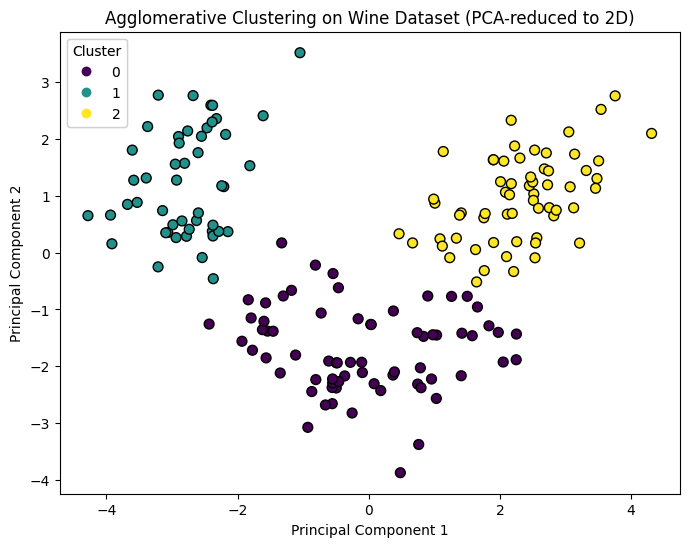

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target # The true labels (for comparison/visualization)

# 2. Standardize the features (important for PCA and clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce the dataset to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by the first two principal components:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))
print(f"Shape after PCA: {X_pca.shape}")

# 4. Apply Agglomerative Clustering
# The Wine dataset has 3 natural classes, so we set n_clusters=3
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
# 'ward' linkage is generally recommended for Euclidean distances
cluster_labels = agg_clustering.fit_predict(X_pca)

# 5. Visualize the result in 2D with a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Add title and labels
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
plt.gca().add_artist(legend1)

plt.show()


# Q10 You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)

ANS10   As a data analyst, I would approach this customer segmentation task by focusing on Behavioral Segmentation (how they buy) supplemented by demographic data. This approach is more actionable than relying on demographics alone.


Here is the real-world data science workflow for this project:

#1. Data Preprocessing & Feature Engineering
.Missing Values: I would check for nulls. If missing data is minimal (<5%), I would drop rows. For critical features (e.g., total spend), I might impute with the median to avoid skewing the data, as ecommerce data is often skewed.


.Feature Engineering (RFM): I would convert raw purchase history into an RFM model (Recency, Frequency, Monetary value), which is standard for e-commerce.

.Recency: Days since last purchase.


.Frequency: Total number of purchases.

.Monetary: Total revenue generated.

.Categorical Encoding: One-hot encode gender or location, if relevant.

Scaling: Since K-Means relies on Euclidean distance, I would use StandardScaler to normalize features to have a mean of 0 and a variance of 1. This prevents high-value features (like Monetary) from dominating low-value ones (like Frequency).

#2. Clustering Algorithm Selection

I would use K-Means Clustering, supplemented by Elbow/Silhouette analysis, for the following reasons:

.Interpretability: K-Means provides clear, compact, spherical clusters that are easy to interpret as "Personas" for marketing teams.

.Scalability: It is fast and efficient for large e-commerce datasets.

.Actionable Centroids: The final centroids represent the "average customer" of that segment, allowing for simple profiling (e.g., "High Spend, Low Recency")




#3. Determining the Number of Clusters
 I would determine the optimal number of clusters (\(k\)) using a combination of methods:

. Elbow Method (Inertia): I will plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters (1-10) and look for the "knee" or "elbow" point where the drop in inertia slows down.

.Silhouette Score: I will calculate the Silhouette Score for different \(k\) values to measure how similar an object is to its own cluster compared to other clusters. The highest silhouette score indicates the best-separated clusters.

#4. Marketing Team Benefits


The marketing team can use the clustered segments to:

.Target "Champions": Offer exclusive early access to new products to the high-frequency/high-monetary cluster.

.Re-engage "At-Risk" Customers: Target users with high recency (not purchased in a long time) and high past spend with "We Miss You" coupons.

.Optimize Ad Spend: Focus ad budget on high-value, high-potential clusters rather than wasting money on one-time, low-value buyers.



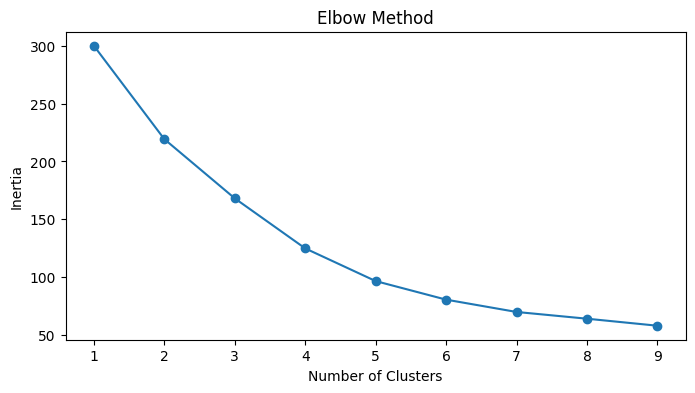

Cluster Profiles (Mean Values):
           Recency  Frequency     Monetary
Cluster                                   
0        78.282609  25.195652  1946.391304
1        31.615385  10.769231  1897.576923
2        27.178571  36.428571  3343.892857


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dummy Data Generation (Simulating E-commerce Data)
data = {
    'CustomerID': range(1, 101),
    'Recency': np.random.randint(1, 100, 100),
    'Frequency': np.random.randint(1, 50, 100),
    'Monetary': np.random.randint(100, 5000, 100)
}
df = pd.DataFrame(data)

# 2. Data Preprocessing
features = ['Recency', 'Frequency', 'Monetary']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Determine Optimal Number of Clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualize Elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on elbow, let's pick k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Analyze Results
cluster_profiles = df.groupby('Cluster')[features].mean()
print("Cluster Profiles (Mean Values):")
print(cluster_profiles)

# Output Analysis:
# Cluster 0: High Recency (Inactive), Low Spend -> At-Risk
# Cluster 1: Low Recency (Recent), High Spend, High Freq -> Champions
# Cluster 2: Moderate -> Casual Buyers
